In [1]:
#import libraries:

import seaborn as sns

import pandas as pd
from datetime import datetime

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import FormatStrFormatter

In [2]:
#use the csv sheets provided or fredapi library to get the data of economic factors:
#currently there are 11 features in the drive, you can add any other features which you feel are suitable in detecing the regimes:

borrowCommBank = pd.read_csv("borrow from comm banks.csv")
borrowFed = pd.read_csv("BORROW from fed.csv")
brentCrude = pd.read_csv("brent crude.csv")
exRate = pd.read_csv("Exchange Rate.csv")
fedExpen = pd.read_csv("Fed total expenditure.csv")
GDP = pd.read_csv("GDP.csv")
housPri = pd.read_csv("Housing price index.csv")
inflat = pd.read_csv("inflation data.csv")
interestRate = pd.read_csv("interest rates.csv")
recessProb = pd.read_csv("Recesion probabilities.csv")
stockMarketCap = pd.read_csv("Stock Market cap.csv")
unemployRate = pd.read_csv("Unemployment rates.csv")

print(brentCrude.iloc[18, :])

DATE          1987/6/16
brentCrude         18.9
Name: 18, dtype: object


In [3]:
#put them to a list, clear NA values

itemList = []
itemList.append(borrowCommBank)
itemList.append(borrowFed)
itemList.append(brentCrude)
itemList.append(exRate)
itemList.append(fedExpen)
itemList.append(GDP)
itemList.append(housPri)
itemList.append(inflat)
itemList.append(interestRate)
itemList.append(recessProb)
itemList.append(stockMarketCap)
itemList.append(unemployRate)

print(itemList[2])
    
for data in itemList:
    data.dropna()

           DATE  brentCrude
0     1987/5/20       18.63
1     1987/5/21       18.45
2     1987/5/22       18.55
3     1987/5/25       18.60
4     1987/5/26       18.63
...         ...         ...
8921  2022/7/12      106.98
8922  2022/7/13      107.17
8923  2022/7/14      107.74
8924  2022/7/15      112.26
8925  2022/7/18      117.27

[8926 rows x 2 columns]


In [4]:
#checkpoint
print(itemList[2].columns)
print(itemList[2])
print(itemList[2].iloc[18, :])

Index(['DATE', 'brentCrude'], dtype='object')
           DATE  brentCrude
0     1987/5/20       18.63
1     1987/5/21       18.45
2     1987/5/22       18.55
3     1987/5/25       18.60
4     1987/5/26       18.63
...         ...         ...
8921  2022/7/12      106.98
8922  2022/7/13      107.17
8923  2022/7/14      107.74
8924  2022/7/15      112.26
8925  2022/7/18      117.27

[8926 rows x 2 columns]
DATE          1987/6/16
brentCrude         18.9
Name: 18, dtype: object


In [5]:
#Preprocessing, use appropriate methods to fill the missing values in the data:

#resample at the beginning of each month -> monthly data

def averageAsMonthly(data):
    
    new_monthly_data = data.set_index('DATE').resample('MS').mean()
    return new_monthly_data

def interpolateAsMonthly(data):
    
    new_monthly_data = data.set_index('DATE').resample('MS').asfreq()
    new_monthly_data = new_monthly_data.fillna(new_monthly_data.interpolate())
    return new_monthly_data

for i in range(12):
    x_ticks = (itemList[i])['DATE']
    try:
        xs = [datetime.strptime(str(d), '%Y-%m-%d') for d in x_ticks]  
    except(ValueError):
        xs = [datetime.strptime(str(d), '%Y/%m/%d') for d in x_ticks]
    (itemList[i])['DATE'] = pd.to_datetime((itemList[i])['DATE'])
    if i == 0 or i == 2 or i == 3:
        itemList[i] = averageAsMonthly(itemList[i])
    else: itemList[i] = interpolateAsMonthly(itemList[i])


In [6]:
#group together

new_all = itemList[0]
for i in itemList[1:]:
    new_all = pd.merge(new_all, i, on = 'DATE')
new_all.to_csv('./all.csv')

In [7]:
#split the data

new_all = pd.read_csv('all.csv')
datasets = new_all.iloc[:, 1:]

#feature scaling

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(datasets)
#X_Test = sc_X.transform(X_Test)

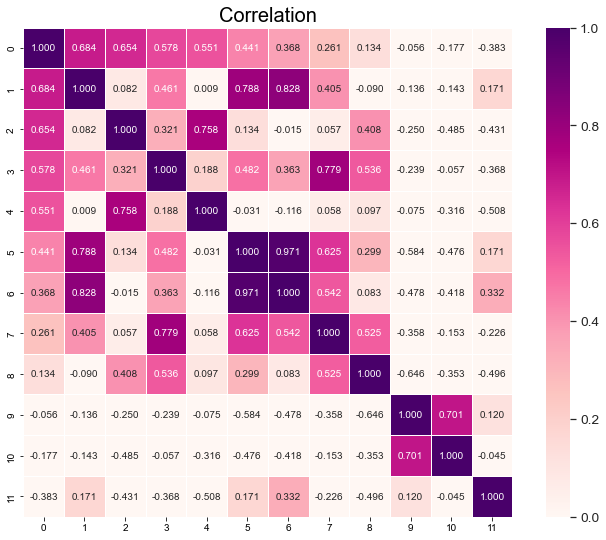

In [8]:
X_c = pd.DataFrame(X_Train)
X_c.columns = [i for i in range(X_c.shape[1])]
 
#calculate pearson
corrmat = X_c.corr()
f, ax = plt.subplots(figsize=(12, 9))
 
k = 30
cols = corrmat.nlargest(k, X_c.columns[0]).index
 
cm = np.corrcoef(X_c[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt=".3f",
                 vmin=0,
                 vmax=1,
                 linewidths=.5,
                 cmap="RdPu",
                 annot_kws={"size": 10},
                 xticklabels=True,
                 yticklabels=True)

# plt.ylabel(fontsize=15,)
# plt.xlabel(fontsize=15)
plt.title("Correlation", fontsize=20)
plt.show()

In [9]:
#conduct PCA analysis on the processed data:

pca = PCA(n_components = 4)
X_Train = pca.fit_transform(X_Train)
print(sum(pca.explained_variance_ratio_))



0.8937619948165275


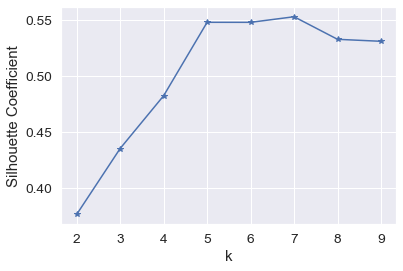

In [10]:
#additional task:once the PCA is conducted apply any clusterting techniques to find regimes:

scores = []
for k in range(2, 10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X_Train)
    scores.append(silhouette_score(X_Train, estimator.labels_, metric='euclidean'))
x = range(2, 10)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.plot(x, scores, '*-')
plt.show()

E:\iAmCoder\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


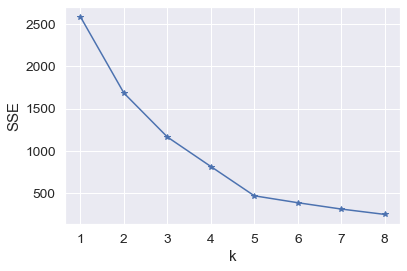

In [11]:
sse = []
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X_Train)
    sse.append(estimator.inertia_)
x = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x, sse, '*-')
plt.show()

In [12]:
#fit a K-means model

kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_Train)

datetime = new_all['DATE']

X_Train = pd.DataFrame(X_Train.reshape(241, 4))

res = kmeans.labels_
res_seri = pd.Series(res)

new_all = pd.concat([datetime, X_Train, res_seri], axis = 1)
new_all.columns = ['DATE', 'PC1', 'PC2', 'PC3', 'PC4', 'Cluster']
print(new_all)

           DATE       PC1       PC2       PC3       PC4  Cluster
0    1999-01-01  3.941208  0.547742 -0.781542  0.452138        2
1    1999-02-01  4.020174  0.542850 -0.778093  0.489773        2
2    1999-03-01  4.096170  0.498134 -0.703272  0.515215        2
3    1999-04-01  4.110664  0.487334 -0.713925  0.447273        2
4    1999-05-01  4.130485  0.472155 -0.620800  0.428411        2
..          ...       ...       ...       ...       ...      ...
236  2018-09-01 -1.428023 -2.870503  1.279539  0.904070        4
237  2018-10-01 -1.480336 -2.890846  1.257014  0.958195        4
238  2018-11-01 -1.321760 -2.903803  1.271399  1.262206        4
239  2018-12-01 -1.245234 -2.924822  1.296190  1.368394        4
240  2019-01-01 -1.346073 -2.939339  1.288163  1.375305        4

[241 rows x 6 columns]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6548\3190370769.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(line, ax=axs[i])


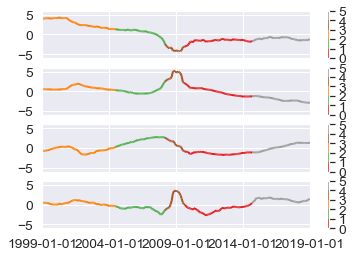

In [13]:
import matplotlib.ticker as mticker

fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)

cmap = plt.get_cmap('Set1')
norm = BoundaryNorm([0, 1, 2, 3, 4, 5], cmap.N)
x = np.array(range(241))
cluster = new_all['Cluster']

for i in range(4):
    
    y = new_all['PC'+str(i+1)]

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(cluster)
    lc.set_linewidth(2)
    line = axs[i].add_collection(lc)
    fig.colorbar(line, ax=axs[i])


xlabels = axs[0].get_xticks().tolist()
axs[0].xaxis.set_major_locator(mticker.FixedLocator(xlabels))
axs[0].xaxis.set_ticks(range(0,241,60))
axs[0].xaxis.set_ticklabels(new_all['DATE'][0:241:60])
axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-6, 6)

plt.show()